In [162]:
import sys
import torch.nn as nn
from torch import nn, optim
import torch.nn.functional as F

sys.path.append("..")
from nets import lenet
from utils import trainer
from utils import utils
from utils import plots
import matplotlib.pyplot as plt

BATCH_SIZE = 256

In [75]:
feature_data_raw, label_data_raw = utils.get_raw_data()
features_train, targets_train, features_test, targets_test = utils.get_partitioned_data(feature_data_raw, label_data_raw)
train_loader, test_loader = utils.get_data_loader(features_train, targets_train, features_test, targets_test, batch_size = BATCH_SIZE)

# Inspect data

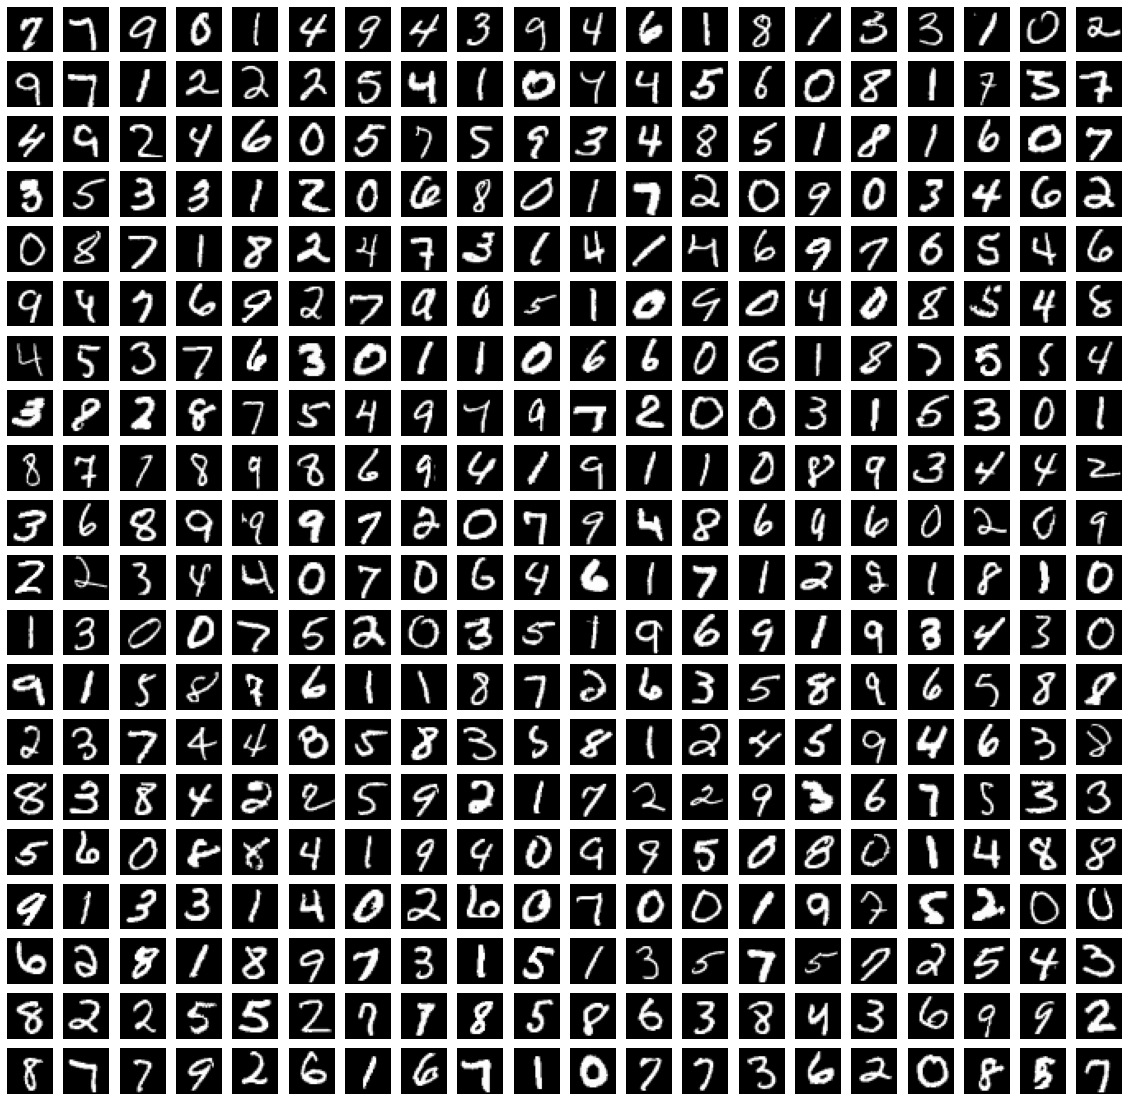

In [163]:
plots.inspect_data(train_loader)

# Train model

Epoch: 1/40 –– Train loss: 229.550 –– Train accuracy: 0.463 –– Test loss: 25.218 –– Test accuracy: 0.813
Epoch: 2/40 –– Train loss: 62.529 –– Train accuracy: 0.883 –– Test loss: 10.580 –– Test accuracy: 0.914
Epoch: 3/40 –– Train loss: 33.389 –– Train accuracy: 0.931 –– Test loss: 7.183 –– Test accuracy: 0.940
Epoch: 4/40 –– Train loss: 23.675 –– Train accuracy: 0.949 –– Test loss: 5.489 –– Test accuracy: 0.951
Epoch: 5/40 –– Train loss: 18.432 –– Train accuracy: 0.960 –– Test loss: 4.466 –– Test accuracy: 0.961
Epoch: 6/40 –– Train loss: 15.216 –– Train accuracy: 0.966 –– Test loss: 3.797 –– Test accuracy: 0.966
Epoch: 7/40 –– Train loss: 12.798 –– Train accuracy: 0.972 –– Test loss: 3.369 –– Test accuracy: 0.968
Epoch: 8/40 –– Train loss: 11.275 –– Train accuracy: 0.975 –– Test loss: 2.994 –– Test accuracy: 0.973
Epoch: 9/40 –– Train loss: 9.892 –– Train accuracy: 0.978 –– Test loss: 2.693 –– Test accuracy: 0.977
Epoch: 10/40 –– Train loss: 8.839 –– Train accuracy: 0.980 –– Test loss

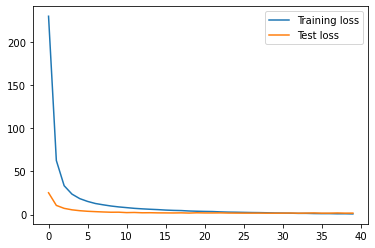

In [157]:
net = lenet.Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr = 0.0015)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max = 200)
epochs = 40

trainer.train(net, optimizer, criterion, scheduler, train_loader, test_loader, epochs)

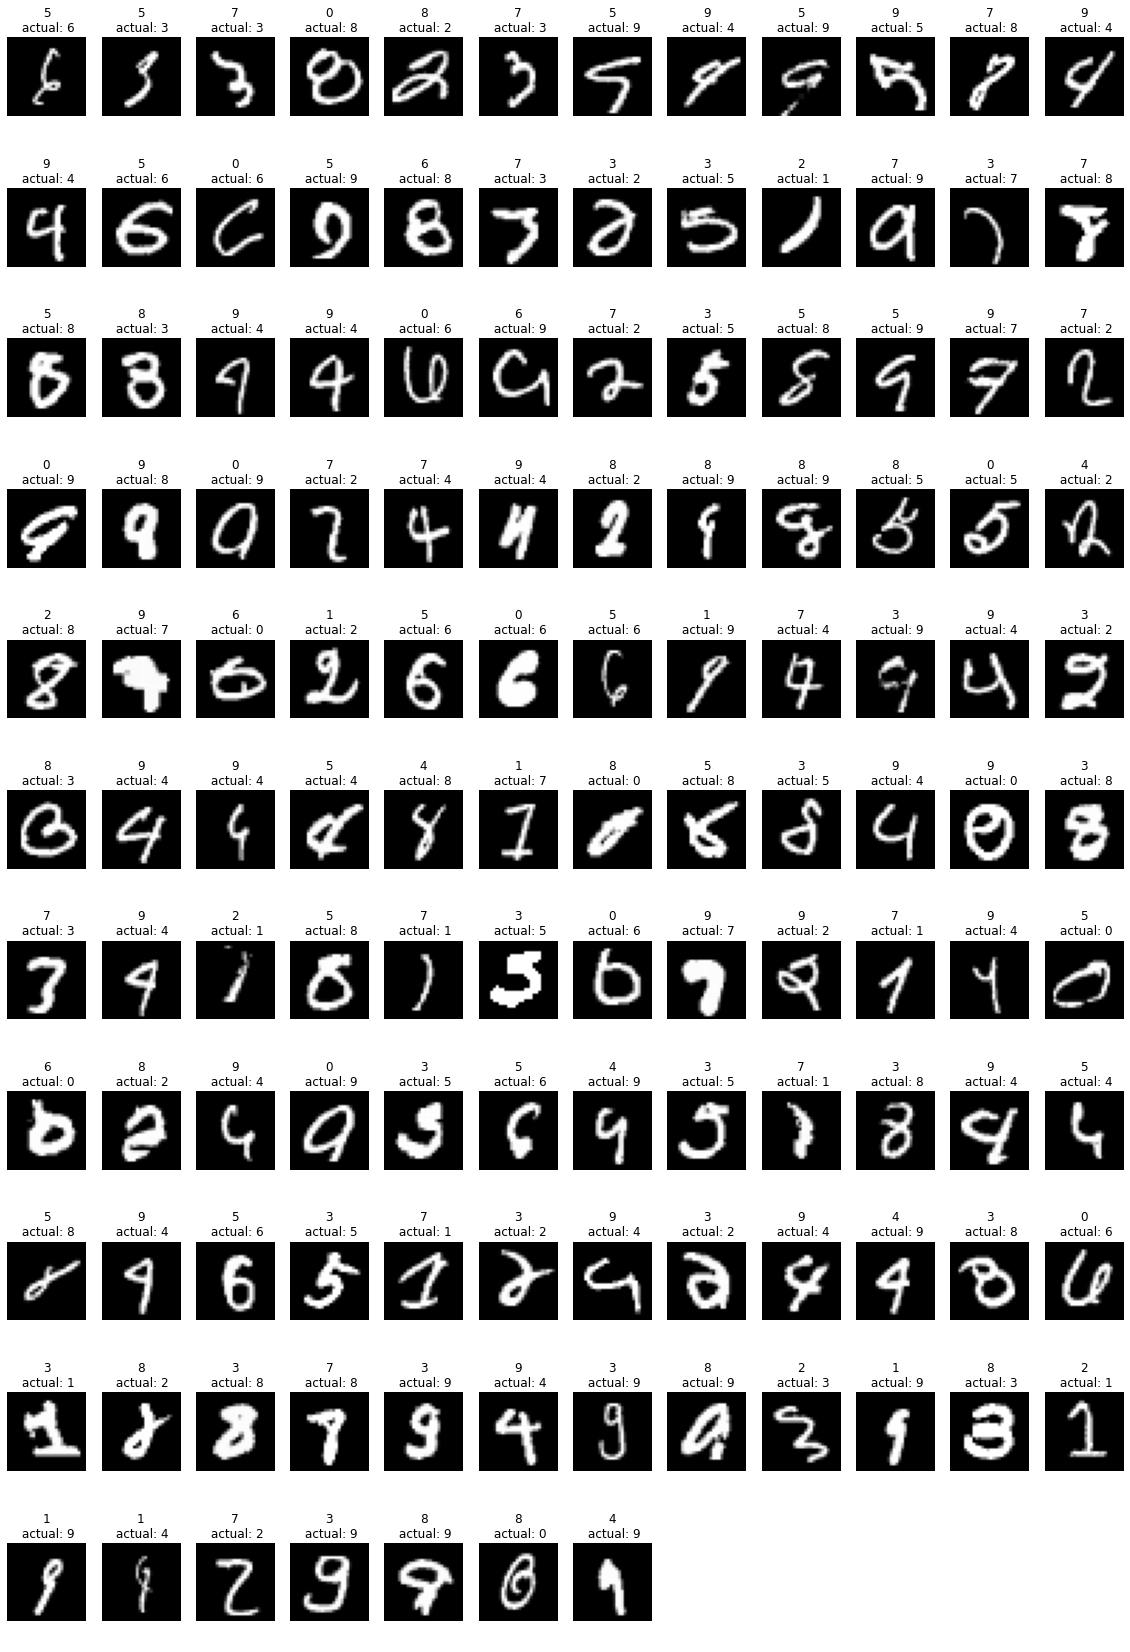

In [161]:
features_misclass, labels_misclass = utils.get_misclassified(net, test_loader)
plots.inspect_misclassified(net, features_misclass, labels_misclass)